In [1]:
# # Import Json file 

# from google.colab import files

# files.upload()

# **Milestone 2 Phase 2**

## 1- Introduction

      Name : Khalisul Akbar
      Batch : FTDS - Batch 10

### Description

##### Obejective :
- To gain an understanding in Computer Vision.
- Understand how to prepare the data needed for Computer Vision.
- Able to create a neural network model suitable for Computer vision.
- Able to Analyze the model layer and to optimize the model.

##### Problem Statement:
- Data preparation for Computer Vision.
- Finding Model optimization technique to improve model performance in terms of its accuracy and its loss.
- Model Deployment.

# **Working Area**

## 2- Import Libararies

In [2]:
# import Library

import os
import glob
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

## 3- Data Loading

* Change to directory dataset

In [3]:
%cd /content/drive/MyDrive/kaggle/imagesmil2/

/content/drive/MyDrive/kaggle/imagesmil2


In [4]:
%ls 

800px-Human_eye_with_blood_vessels.jpg
balls.csv
class_dict.csv
istockphoto-137345149-612x612.jpg
istockphoto-464266137-612x612.jpg
m2_test.csv
model_best.hdf5
model.png
pilates-toning-weighted-medicine-ball-3-kg.jpg
Spalding_Basketball.jpg
test/
train/
valid/


In [5]:
os.listdir('/content/drive/MyDrive/kaggle/imagesmil2')

['balls.csv',
 'class_dict.csv',
 'test',
 'train',
 'valid',
 '.ipynb_checkpoints',
 'Spalding_Basketball.jpg',
 'pilates-toning-weighted-medicine-ball-3-kg.jpg',
 'istockphoto-464266137-612x612.jpg',
 'istockphoto-137345149-612x612.jpg',
 '800px-Human_eye_with_blood_vessels.jpg',
 'm2_test.csv',
 'model.png',
 'model_best.hdf5']

From the result we can see that, the dataset has already been splitted into three dataset :
* Train set
* Test set
* Val set

In [6]:
main_path= '/content/drive/MyDrive/kaggle/imagesmil2'

* Load the dataset

In [7]:
# data directory 

train_dir = os.path.join(main_path,'train')
test_dir = os.path.join(main_path,'test')
val_dir = os.path.join(main_path,'valid')

In [8]:
# load dataset 
df = pd.read_csv("balls.csv")
df

,filepaths,labels,data set
0,train/baseball/001.jpg,baseball,train
1,train/baseball/002.jpg,baseball,train
2,train/baseball/003.jpg,baseball,train
3,train/baseball/004.jpg,baseball,train
4,train/baseball/005.jpg,baseball,train
...,...,...,...
3306,valid/wrecking ball/1.jpg,wrecking ball,valid
3307,valid/wrecking ball/2.jpg,wrecking ball,valid
3308,valid/wrecking ball/3.jpg,wrecking ball,valid
3309,valid/wrecking ball/4.jpg,wrecking ball,valid


In [9]:
# Checking dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3311 entries, 0 to 3310
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filepaths  3311 non-null   object
 1   labels     3311 non-null   object
 2   data set   3311 non-null   object
dtypes: object(3)
memory usage: 77.7+ KB


In total, there are 3311 images data.

In [10]:
# Create dataframe for Train, Test, and Val

train_df = df[df['data set'] == 'train'].iloc[:,0:2]
train_df = train_df.sample(frac=1, random_state=1).reset_index(drop=True)

test_df = df[df['data set'] == 'test'].iloc[:,0:2]
test_df = test_df.sample(frac=1, random_state=1).reset_index(drop=True)

val_df = df[df['data set'] == 'valid'].iloc[:,0:2]
val_df = val_df.sample(frac=1, random_state=1).reset_index(drop=True)

In [11]:
train_df

,filepaths,labels
0,train/baseball/007.jpg,baseball
1,train/volley ball/027.jpg,volley ball
2,train/wiffle ball/04.jpg,wiffle ball
3,train/bowling ball/126.jpg,bowling ball
4,train/buckeyballs/77.jpg,buckeyballs
...,...,...
3046,train/water polo ball/020.jpg,water polo ball
3047,train/cannon ball/103.jpg,cannon ball
3048,train/cricket ball/111.jpg,cricket ball
3049,train/beachballs/08.jpg,beachballs


In [12]:
# checking the dimension of all dataset

print('train_df : ', train_df.shape)
print('test_df : ', test_df.shape)
print('val_df : ', val_df.shape)

train_df :  (3051, 2)
test_df :  (130, 2)
val_df :  (130, 2)


## 4- Exploratory Data Analysis (EDA)

### 1. Taking a look at the proportions between data train, test and set.

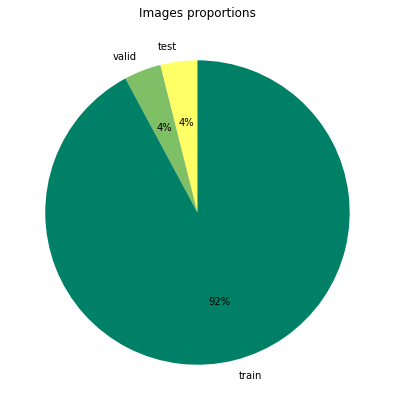

In [13]:
# splitted data proportion

plt.figure(figsize=(20,7))
df.groupby("data set")['data set'].count().sort_values().plot(kind='pie', autopct='%.0f%%' , ylabel='' , startangle=90, cmap= 'summer_r').set_title('Images proportions')
plt.show()

From the pie chart above we can see that images for train set has the largest proportion at 92%.

### 2. Ball Images Proportion

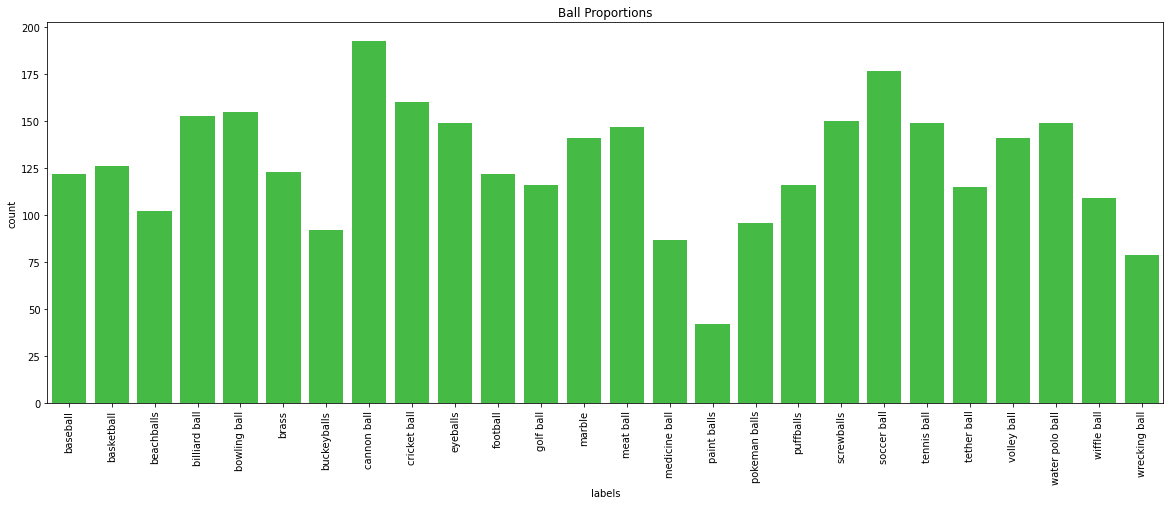

In [14]:
plt.figure(figsize=(20,7))  
sns.countplot(data=df , x='labels', color='limegreen').set_title('Ball Proportions')
plt.xticks(rotation=90)
plt.show()

Top 3 ball with the highest images :

In [15]:
df.groupby("labels")['labels'].count().sort_values(ascending=False).head(3)

labels
cannon ball     193
soccer ball     177
cricket ball    160
Name: labels, dtype: int64

Cannon ball number of images is the largest.

Top 3 ball with the lowest number of images:

In [16]:
df.groupby("labels")['labels'].count().sort_values(ascending=False).tail(3)

labels
medicine ball    87
wrecking ball    79
paint balls      42
Name: labels, dtype: int64

The paint balls has the lowest number of images. If we compare between the ball with the lowest images and the ball with the highest we have a result of almost 1 : 4.6. This mean that the dataset might be imbalanced. 

### Visualize sample images

In [17]:
# slice images from data Train

random_sample_1 = train_df['filepaths'].iloc[:5].tolist()
random_sample_2 = train_df['filepaths'].iloc[100:105].tolist()
random_sample_3 = train_df['filepaths'].iloc[-5:].tolist()

visualize random samples : 


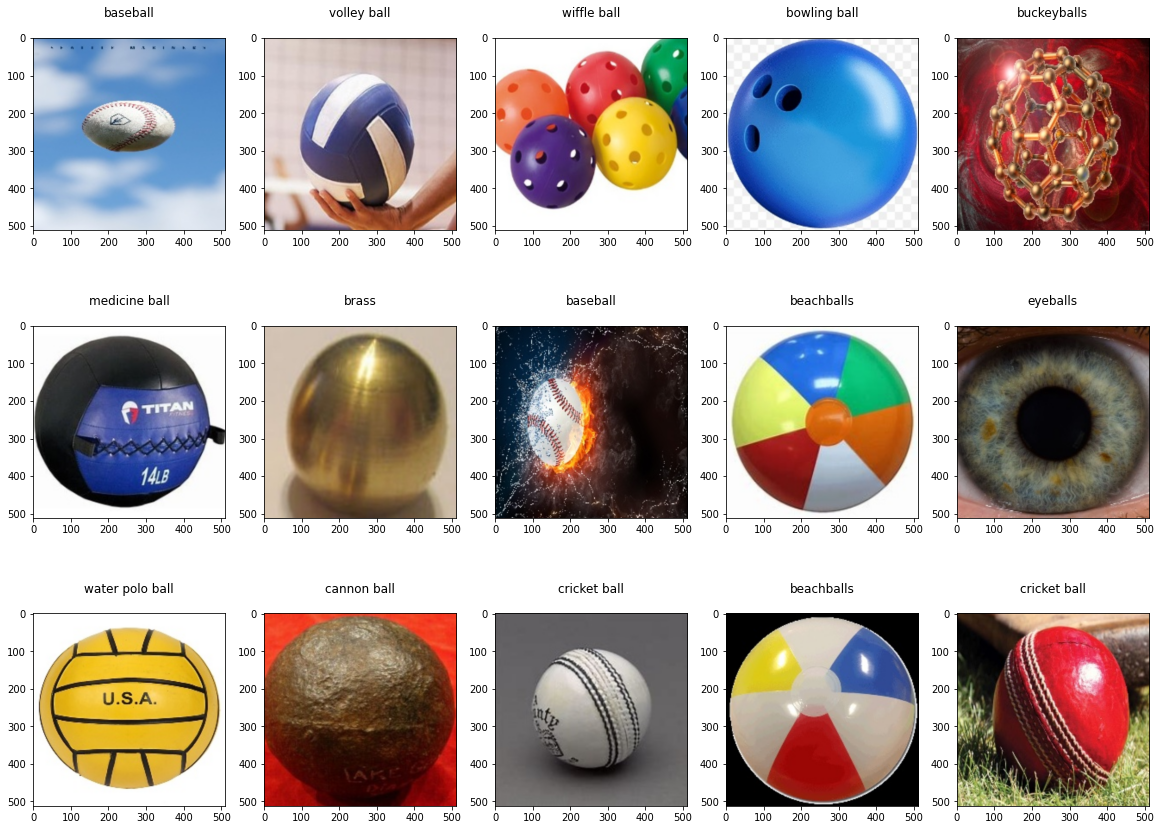

In [18]:
# visualize samples images

def visualize_samples(samples):
    fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(20,15))
    for i, sample in enumerate(samples):
        img = cv2.imread(sample)
        img = cv2.resize(img, (512,512))
        # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax[i//5, i%5].set_title(sample.split('/')[-2]+ '\n')
        ax[i//5, i%5].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

print ('visualize random samples : ')
visualize_samples(random_sample_1 + random_sample_2 + random_sample_3)

I picked some random images from the dataset  to see how the images in the dataset look like.

## 5- Data Preprocessing

Since the dataset has been splitted from the start, we dont have to use train_test_split library. We can just directly call train,test, and val dataset as shown below.

### 1. Train, test, val dataset

In [19]:
# train set

print('train_df :',train_df.shape)
train_df.head()

train_df : (3051, 2)


,filepaths,labels
0,train/baseball/007.jpg,baseball
1,train/volley ball/027.jpg,volley ball
2,train/wiffle ball/04.jpg,wiffle ball
3,train/bowling ball/126.jpg,bowling ball
4,train/buckeyballs/77.jpg,buckeyballs


In [20]:
# test set

print('test_df :',test_df.shape)
test_df.head()

test_df : (130, 2)


,filepaths,labels
0,test/tether ball/4.jpg,tether ball
1,test/tether ball/1.jpg,tether ball
2,test/cannon ball/1.jpg,cannon ball
3,test/wiffle ball/5.jpg,wiffle ball
4,test/football/4.jpg,football


In [21]:
# val set

print('val_df :',val_df.shape)
val_df.head()

val_df : (130, 2)


,filepaths,labels
0,valid/tether ball/4.jpg,tether ball
1,valid/tether ball/1.jpg,tether ball
2,valid/cannon ball/1.jpg,cannon ball
3,valid/wiffle ball/5.jpg,wiffle ball
4,valid/football/4.jpg,football


### 2. Build an input pipeline, in this case using Keras ImageDataGenerator

In [22]:
# declare variables

img_height= 128
img_width= 128
SEED = 1
BATCH =32

# To stabilize the output of the model

np.random.seed(42)
tf.random.set_seed(42)

In [23]:
# Data Augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255, # pixel normalization
    rotation_range=0.1,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

vaL_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
ds_train = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(img_height, img_width), # Set the target images size
    class_mode='categorical',
    batch_size=BATCH,
    shuffle=True,
    seed=SEED)

ds_test = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(img_height, img_width), # Set the target images size
    class_mode='categorical',
    batch_size=BATCH,
    shuffle=False, # Set false only for data test
    seed=SEED)

ds_val = vaL_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(img_height, img_width), # Set the target images size
    class_mode='categorical',
    batch_size=BATCH,
    shuffle=True, 
    seed=SEED)


Found 3051 validated image filenames belonging to 26 classes.
Found 130 validated image filenames belonging to 26 classes.
Found 130 validated image filenames belonging to 26 classes.


In [25]:
# the result of label encoding using image data generator

ds_train.class_indices

{'baseball': 0,
 'basketball': 1,
 'beachballs': 2,
 'billiard ball': 3,
 'bowling ball': 4,
 'brass': 5,
 'buckeyballs': 6,
 'cannon ball': 7,
 'cricket ball': 8,
 'eyeballs': 9,
 'football': 10,
 'golf ball': 11,
 'marble': 12,
 'meat ball': 13,
 'medicine ball': 14,
 'paint balls': 15,
 'pokeman balls': 16,
 'puffballs': 17,
 'screwballs': 18,
 'soccer ball': 19,
 'tennis ball': 20,
 'tether ball': 21,
 'volley ball': 22,
 'water polo ball': 23,
 'wiffle ball': 24,
 'wrecking ball': 25}

## 6- Model Definition and Model Training

Using tensorflow callback so that when training the model, the best model from epochs can be automatically saved. 
1. First, using early stopping to monitor 'val_loss' in this case with the patience of 3 so the training will stop after the val_loss drop 3 times from the best value.
2. ModelCheckpoint, to save the model with the best 'val_loss' in this case. Model willbe saved as 'model_best.hdf5' format.

In [26]:
# callbacks

callbacks= [
    EarlyStopping(monitor= 'val_loss', mode= 'min', patience= 3, verbose=1),
    ModelCheckpoint('model_best.hdf5', monitor='val_loss', save_best_only= True)
    #ReduceLROnPlateau

]

1. Simple model

simple model using 1 convolution layer , 1 flatten layer, 1 hidden layer, and 1 output layer.

In [27]:
# Model Definition 

input= [img_height,img_width,3]

model_simple= Sequential()

#Conv 1
model_simple.add(Conv2D(filters=32,kernel_size=3, activation= 'relu', input_shape=input)) #bisa atur kernel_initializer
model_simple.add(MaxPooling2D(pool_size=2, strides=2)) #bisa atur padding
#dropout atau batch norm

model_simple.add(Flatten())
model_simple.add(Dense(units=52, activation='relu'))

model_simple.add(Dense(units=26, activation='softmax'))
model_simple.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 52)                6604468   
                                                                 
 dense_1 (Dense)             (None, 26)                1378      
                                                                 
Total params: 6,606,742
Trainable params: 6,606,742
Non-trainable params: 0
______________________________________________

In [28]:
# Model compile

model_simple.compile(optimizer='adam', loss='categorical_crossentropy',  metrics= ['accuracy'])

In [29]:
# Model Training

epochs=10
history_simple= model_simple.fit(ds_train, batch_size= BATCH, epochs=epochs, 
                          validation_data= ds_val, verbose=1)

Epoch 1/10
96/96 [==============================] - 707s 7s/step - loss: 3.5104 - accuracy: 0.0760 - val_loss: 3.0812 - val_accuracy: 0.0769
Epoch 2/10
96/96 [==============================] - 53s 548ms/step - loss: 3.0722 - accuracy: 0.0865 - val_loss: 3.0446 - val_accuracy: 0.1000
Epoch 3/10
96/96 [==============================] - 53s 555ms/step - loss: 2.9914 - accuracy: 0.1327 - val_loss: 2.9890 - val_accuracy: 0.1077
Epoch 4/10
96/96 [==============================] - 52s 540ms/step - loss: 2.9312 - accuracy: 0.1459 - val_loss: 3.0685 - val_accuracy: 0.1462
Epoch 5/10
96/96 [==============================] - 52s 542ms/step - loss: 2.8331 - accuracy: 0.1990 - val_loss: 2.8797 - val_accuracy: 0.1846
Epoch 6/10
96/96 [==============================] - 52s 543ms/step - loss: 2.7430 - accuracy: 0.2173 - val_loss: 2.7606 - val_accuracy: 0.1923
Epoch 7/10
96/96 [==============================] - 52s 544ms/step - loss: 2.6012 - accuracy: 0.2439 - val_loss: 2.6510 - val_accuracy: 0.2154
E

The performance of this model is not good. So we have to tweak some hyperparameter. as shown in the next model.

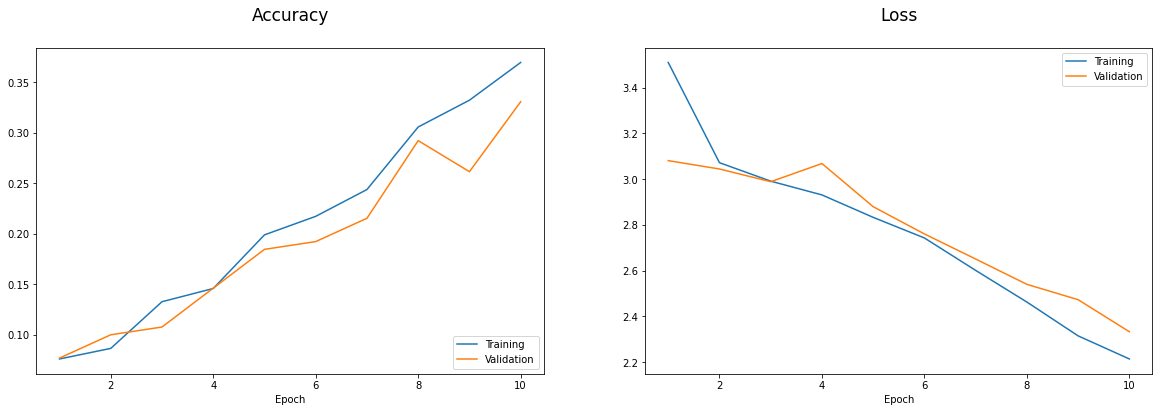

In [30]:
# Plot model performance history

fig,ax=plt.subplots(ncols=2,figsize=(20,6))
epochs=len(history_simple.history['accuracy'])
ax[0].plot(range(1,epochs+1),history_simple.history['accuracy'], label='Training')
ax[0].plot(range(1,epochs+1),history_simple.history['val_accuracy'], label='Validation')
ax[0].set_title('Accuracy\n', fontsize=17)
ax[0].set_xlabel('Epoch')
ax[0].legend(loc = 'lower right')

ax[1].plot(range(1,epochs+1),history_simple.history['loss'],label='Training')
ax[1].plot(range(1,epochs+1),history_simple.history['val_loss'],label='Validation')
ax[1].set_title('Loss\n', fontsize=17)
ax[1].set_xlabel('Epoch')
ax[1].legend(loc = 'upper right')
plt.show()

2. Optimized model

In [31]:
# Model Definition

input= [img_height,img_width,3]

model= Sequential()

#Conv 1
model.add(Conv2D(filters=16,kernel_size=3, activation= 'relu', input_shape=input)) #bisa atur kernel_initializer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2, strides=2, padding ='same')) #bisa atur padding
#dropout atau batch norm

#Conv 2
model.add(Conv2D(filters=32,kernel_size=3, activation= 'relu')) #kernel_initializer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2, strides=2, padding ='same')) #bisa atur padding

# add Flatten and layers
model.add(Flatten())
model.add(Dense(units=250, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=100, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=50, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=26, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 32)       128       
 hNormalization)                                                 
                                                      

In [32]:
# Model compile

model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics= ['accuracy'])

In [33]:
# Model Training

epochs=10
history= model.fit(ds_train, batch_size= BATCH, epochs=epochs, 
                          validation_data= ds_val, verbose=1)

Epoch 1/10
96/96 [==============================] - 78s 799ms/step - loss: 2.6925 - accuracy: 0.2743 - val_loss: 3.4025 - val_accuracy: 0.0462
Epoch 2/10
96/96 [==============================] - 76s 789ms/step - loss: 2.0455 - accuracy: 0.4264 - val_loss: 3.7517 - val_accuracy: 0.0462
Epoch 3/10
96/96 [==============================] - 76s 788ms/step - loss: 1.7870 - accuracy: 0.5015 - val_loss: 2.9644 - val_accuracy: 0.1692
Epoch 4/10
96/96 [==============================] - 76s 789ms/step - loss: 1.6669 - accuracy: 0.5156 - val_loss: 2.2743 - val_accuracy: 0.3692
Epoch 5/10
96/96 [==============================] - 75s 782ms/step - loss: 1.5667 - accuracy: 0.5474 - val_loss: 1.8205 - val_accuracy: 0.4615
Epoch 6/10
96/96 [==============================] - 76s 786ms/step - loss: 1.4736 - accuracy: 0.5647 - val_loss: 1.4826 - val_accuracy: 0.5769
Epoch 7/10
96/96 [==============================] - 75s 780ms/step - loss: 1.4137 - accuracy: 0.5811 - val_loss: 1.3468 - val_accuracy: 0.6154

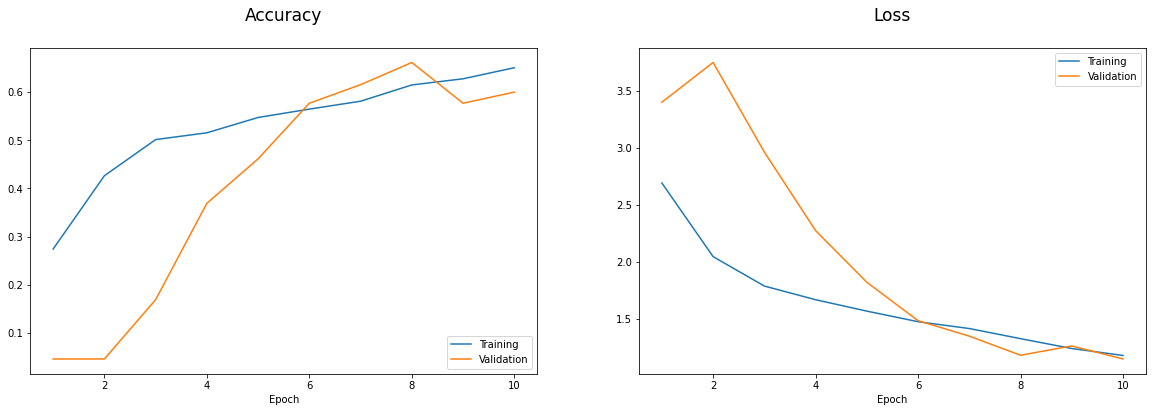

In [34]:
# Plot model performance history

fig,ax=plt.subplots(ncols=2,figsize=(20,6))
epochs=len(history.history['accuracy'])
ax[0].plot(range(1,epochs+1),history.history['accuracy'], label='Training')
ax[0].plot(range(1,epochs+1),history.history['val_accuracy'], label='Validation')
ax[0].set_title('Accuracy\n', fontsize=17)
ax[0].set_xlabel('Epoch')
ax[0].legend(loc = 'lower right')

ax[1].plot(range(1,epochs+1),history.history['loss'],label='Training')
ax[1].plot(range(1,epochs+1),history.history['val_loss'],label='Validation')
ax[1].set_title('Loss\n', fontsize=17)
ax[1].set_xlabel('Epoch')
ax[1].legend(loc = 'upper right')
plt.show()

The result of this model is better than the previous model. However it seems we need to add more epochs or add more conv layers and another fully connected layer to improve its preformance. But by doing so. the time it takes may be longer. So to avoid this problem, i decided to optimized my model using transfer learning.

3. Training model using Transfer Learning :Feature Extraction




Another way to increase the model performance is by using pre-trained model 'imagenet' to train our new training set. Pre-trained model 'imagenet' is trained on a different task and may be very helpful in the process of trainning the new task since the pre trained model is more experienced.

In this process, i decided to use the MobileNet from keras applications which included pre-trained weights. The reason for this is because i choose the fastest Time (ms) per inference step (CPU). The top 3 faster keras applications are :

* MobileNet : 22.6 s
* MobileNetV2 : 25.9 s
* NasNetMobile : 27 s

In [35]:
# initialize the MobileNet model as base model
base_model = tf.keras.applications.MobileNet(weights='imagenet', input_shape=input, include_top=False)

# Freeze all the layers/
for layer in base_model.layers:
    layer.trainable = False
    
# Create the model
my_model = Sequential()

# Add the base model
my_model.add(base_model)
my_model.add(BatchNormalization())
my_model.add(MaxPooling2D(pool_size=2, strides=2, padding ='same')) #bisa atur padding

# Add new layers
my_model.add(Flatten())
my_model.add(Dense(250, activation = 'relu'))
my_model.add(Dense(125, activation = 'relu'))
my_model.add(Dense(50, activation = 'relu'))

# output layers
my_model.add(Dense(26, activation='softmax'))

# Model summary
my_model.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 batch_normalization_5 (Batc  (None, 4, 4, 1024)       4096      
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 1024)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 dense_6 (Dense)             (None, 250)               

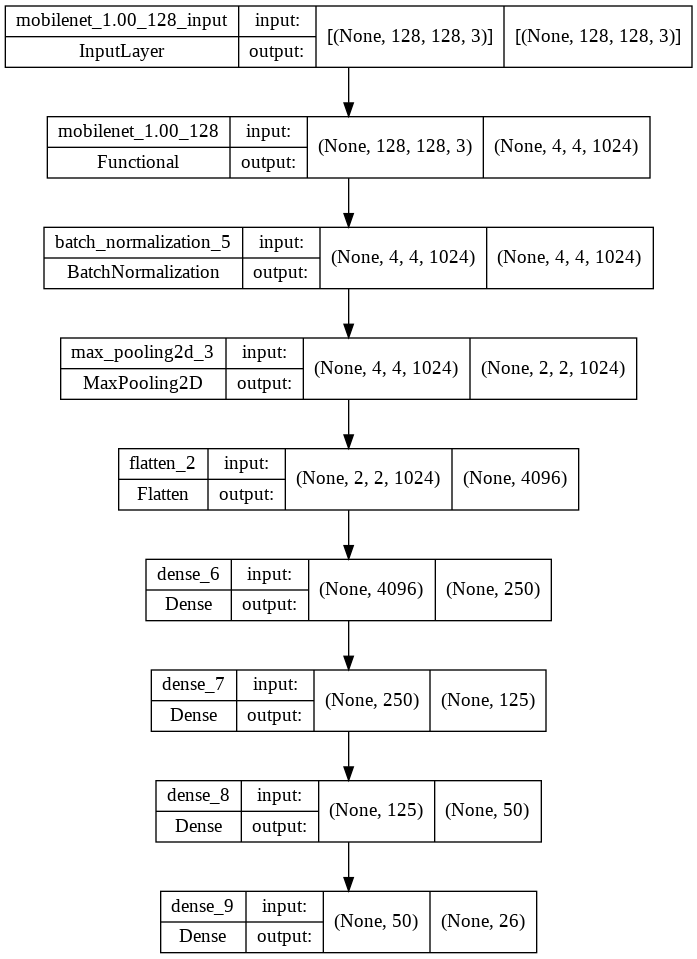

In [36]:
tf.keras.utils.plot_model(my_model, show_shapes=True)

In [37]:
# Model Training

my_model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics= ['accuracy'])

epochs=10
my_history= my_model.fit(ds_train, batch_size= BATCH, epochs=epochs, 
                          validation_data= ds_val, callbacks= callbacks, verbose=1)


Epoch 1/10
96/96 [==============================] - 60s 599ms/step - loss: 1.1181 - accuracy: 0.6847 - val_loss: 0.3660 - val_accuracy: 0.8615
Epoch 2/10
96/96 [==============================] - 56s 586ms/step - loss: 0.3629 - accuracy: 0.8918 - val_loss: 0.3497 - val_accuracy: 0.8769
Epoch 3/10
96/96 [==============================] - 57s 589ms/step - loss: 0.2049 - accuracy: 0.9390 - val_loss: 0.2862 - val_accuracy: 0.9308
Epoch 4/10
96/96 [==============================] - 56s 587ms/step - loss: 0.1495 - accuracy: 0.9525 - val_loss: 0.2215 - val_accuracy: 0.9385
Epoch 5/10
96/96 [==============================] - 56s 580ms/step - loss: 0.1356 - accuracy: 0.9564 - val_loss: 0.2362 - val_accuracy: 0.9308
Epoch 6/10
96/96 [==============================] - 56s 582ms/step - loss: 0.1115 - accuracy: 0.9646 - val_loss: 0.2496 - val_accuracy: 0.9462
Epoch 7/10
96/96 [==============================] - 57s 592ms/step - loss: 0.1136 - accuracy: 0.9656 - val_loss: 0.1673 - val_accuracy: 0.9385

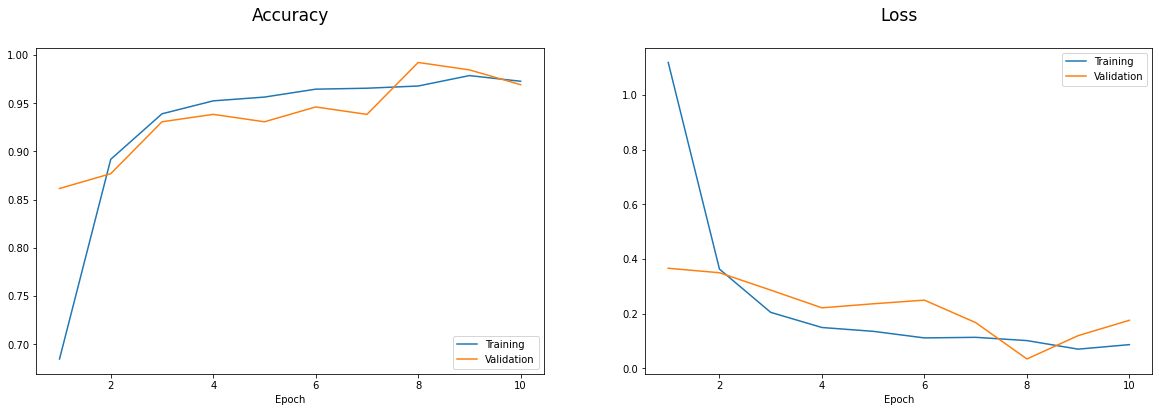

In [38]:
# Plot model performance history

fig,ax=plt.subplots(ncols=2,figsize=(20,6))
epochs=len(my_history.history['accuracy'])
ax[0].plot(range(1,epochs+1),my_history.history['accuracy'], label='Training')
ax[0].plot(range(1,epochs+1),my_history.history['val_accuracy'], label='Validation')
ax[0].set_title('Accuracy\n', fontsize=17)
ax[0].set_xlabel('Epoch')
ax[0].legend(loc = 'lower right')

ax[1].plot(range(1,epochs+1),my_history.history['loss'],label='Training')
ax[1].plot(range(1,epochs+1),my_history.history['val_loss'],label='Validation')
ax[1].set_title('Loss\n', fontsize=17)
ax[1].set_xlabel('Epoch')
ax[1].legend(loc = 'upper right')
plt.show()

From the result we can see that the optimizing model using transfer learning method is succesful since the model accuracy and model loss give a better result. Hence we will use this model as the best model to deploy.

---

## 7- Model Evaluation

Now, we can test the performance of the optimized model using Test set we prepared before hand

In [39]:
# Predict the data test using the best model acquired

predict = my_model.predict(ds_test)
predict

array([[5.3079590e-09, 1.6327534e-05, 1.2050539e-07, ..., 3.2426986e-05,
        2.5626181e-09, 3.5297447e-09],
       [3.3439729e-12, 3.6693176e-08, 1.1829071e-12, ..., 2.7412412e-07,
        1.9643959e-12, 7.2392526e-15],
       [1.4233903e-08, 1.5022610e-09, 5.8982689e-12, ..., 7.7788659e-10,
        2.5572229e-08, 1.2229745e-10],
       ...,
       [5.2481832e-06, 1.2979335e-05, 1.5577636e-09, ..., 3.4262553e-07,
        3.0214042e-06, 9.9931109e-01],
       [2.4961558e-10, 1.7215535e-06, 7.1226781e-11, ..., 9.6566582e-06,
        1.7418797e-10, 1.2265881e-09],
       [3.8931192e-11, 2.0697608e-09, 3.0966078e-12, ..., 8.9468793e-11,
        3.6364075e-11, 2.2043123e-07]], dtype=float32)

In [40]:
# using argmax to find the maximum values indice

y_pred = np.argmax(predict, axis=1)
y_pred_class = dict((v,k) for k,v in ds_test.class_indices.items())
y_pred_class

{0: 'baseball',
 1: 'basketball',
 2: 'beachballs',
 3: 'billiard ball',
 4: 'bowling ball',
 5: 'brass',
 6: 'buckeyballs',
 7: 'cannon ball',
 8: 'cricket ball',
 9: 'eyeballs',
 10: 'football',
 11: 'golf ball',
 12: 'marble',
 13: 'meat ball',
 14: 'medicine ball',
 15: 'paint balls',
 16: 'pokeman balls',
 17: 'puffballs',
 18: 'screwballs',
 19: 'soccer ball',
 20: 'tennis ball',
 21: 'tether ball',
 22: 'volley ball',
 23: 'water polo ball',
 24: 'wiffle ball',
 25: 'wrecking ball'}

In [41]:
# Using the model, we can predict the data set with the result shown below

y_pred

array([21, 21,  7, 24, 10, 13, 18,  9, 10, 24,  6,  8, 15, 17, 23, 24,  3,
       11,  0, 13, 11,  8, 23,  6, 16, 23, 16,  2,  0, 12,  6, 22, 23, 11,
       17, 11, 17, 18,  9, 14, 20,  9, 21, 13, 20, 22, 14, 23,  2,  6,  6,
       19,  7,  3, 25,  5,  7, 24,  7, 25, 19, 18,  8,  0, 22, 19, 23, 24,
        3,  8, 10,  5,  8,  4, 23, 16, 18,  9,  4, 14,  0, 23,  6, 25,  9,
       19,  1, 16, 12,  0, 24, 11,  4, 12, 12,  1, 25,  2, 17, 19, 18, 20,
       17, 13, 22,  2,  5,  5, 21,  2, 16,  3, 20,  4, 10,  5,  1, 21, 14,
       15,  0,  3, 12, 15,  1, 15,  1, 25, 14,  7])

In [42]:
# True classes from dataset

y_test = ds_test.classes 
y_test[:10]

[21, 21, 7, 24, 10, 13, 18, 9, 10, 24]

In [43]:
# Using classification report to evaluate the result of model prediction

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      0.80      0.89         5
           5       1.00      1.00      1.00         5
           6       0.83      1.00      0.91         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      0.80      0.89         5
          14       1.00      1.00      1.00         5
          15       1.00      0.80      0.89         5
          16       1.00      1.00      1.00         5
          17       1.00    

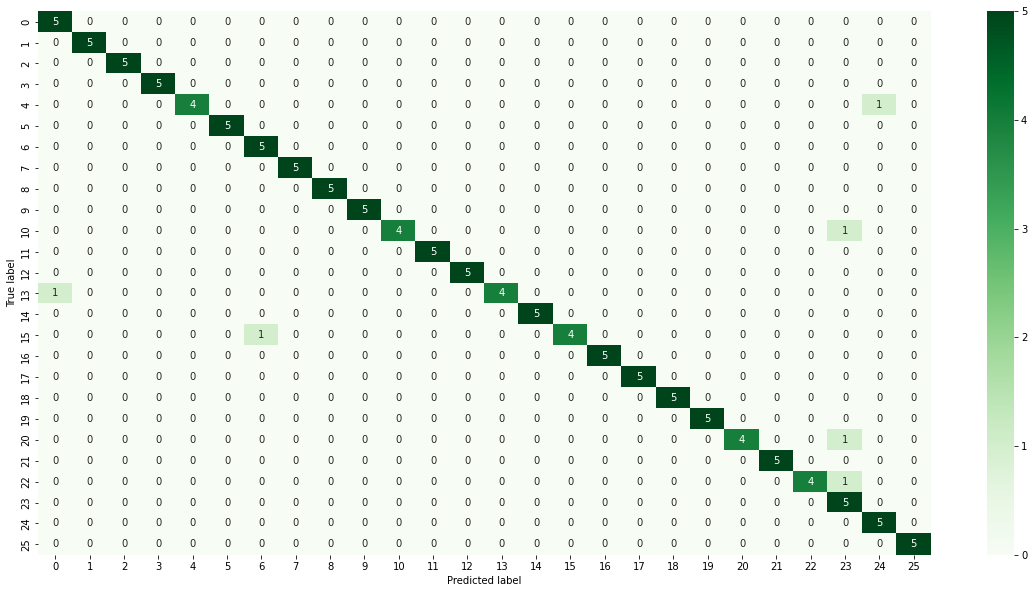

In [44]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test,y_pred)


plt.figure(figsize=(20,10))
sns.heatmap(conf_matrix, annot=True, cmap='Greens', xticklabels=y_pred_class)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [45]:
results = my_model.evaluate(ds_test)

5/5 [==============================] - 2s 324ms/step - loss: 0.2410 - accuracy: 0.9538


From the model evaluation above, we can see that the model performed well with an accuracy of around 95% ++.

## 8- Model saving

The model in this project is automatically saved by using a callback method where during the model training only the best model is saved. The best model is selected according to validation loss value, the lower the value the better the model performance.

The saved model can be loaded as :

In [46]:
saved_model = tf.keras.models.load_model('/content/drive/MyDrive/kaggle/imagesmil2/model_best.hdf5')

In [47]:
# the summary of the saved model :

saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 batch_normalization_5 (Batc  (None, 4, 4, 1024)       4096      
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 1024)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 dense_6 (Dense)             (None, 250)               1024250   
                                                      

## 9- Model Inference

For data inference, i downloaded several images from the internet. the model will be tested whether it can predict the inference images or not. the process of testing is as shown below : 

In [48]:
data_inf = {'images' :['/content/drive/MyDrive/kaggle/imagesmil2/Spalding_Basketball.jpg',
                       '/content/drive/MyDrive/kaggle/imagesmil2/istockphoto-464266137-612x612.jpg',
                       '/content/drive/MyDrive/kaggle/imagesmil2/pilates-toning-weighted-medicine-ball-3-kg.jpg',
                       '/content/drive/MyDrive/kaggle/imagesmil2/800px-Human_eye_with_blood_vessels.jpg',
                       '/content/drive/MyDrive/kaggle/imagesmil2/istockphoto-137345149-612x612.jpg'],
     'label' : ['basketball',
                'golf', 
                'medicine',
                'Eye Ball', 
                'Tenis ball']}

In [49]:
inf = pd.DataFrame(data_inf)

In [50]:
inf

,images,label
0,/content/drive/MyDrive/kaggle/imagesmil2/Spald...,basketball
1,/content/drive/MyDrive/kaggle/imagesmil2/istoc...,golf
2,/content/drive/MyDrive/kaggle/imagesmil2/pilat...,medicine
3,/content/drive/MyDrive/kaggle/imagesmil2/800px...,Eye Ball
4,/content/drive/MyDrive/kaggle/imagesmil2/istoc...,Tenis ball


In [51]:
inf_datagen = ImageDataGenerator(rescale=1./255)


ds_inf = inf_datagen.flow_from_dataframe(
    dataframe=inf,
    x_col='images',
    y_col='label',
    target_size=(img_height, img_width), # Set the target images size
    class_mode='categorical',
    batch_size=BATCH,
    shuffle=False, 
    seed=SEED)


Found 5 validated image filenames belonging to 5 classes.


In [52]:
predict0 = saved_model.predict(ds_inf)
predict0

array([[3.2411197e-07, 9.9315697e-01, 2.2532339e-11, 6.3852888e-14,
        3.2063050e-11, 1.5561705e-08, 2.4785507e-09, 5.9281642e-11,
        7.7156468e-09, 1.5668572e-11, 3.8619312e-08, 1.1991772e-06,
        2.7148757e-05, 8.7448521e-10, 5.4720395e-08, 1.4771807e-10,
        1.3809275e-12, 1.9515408e-11, 2.2534875e-11, 5.2173407e-04,
        4.7752496e-07, 5.4351649e-08, 6.7641338e-08, 6.2918230e-03,
        2.4577781e-11, 5.5417138e-10],
       [1.3229303e-09, 5.8021900e-16, 5.8622176e-15, 7.9698428e-22,
        3.8715373e-10, 1.0191943e-15, 9.0352550e-14, 3.3489407e-09,
        2.2691817e-16, 4.5331746e-20, 4.1750083e-13, 1.0000000e+00,
        4.6860393e-12, 7.7557908e-21, 2.0399001e-10, 1.2672755e-16,
        9.7222959e-11, 3.3115063e-11, 6.1075072e-19, 4.1607669e-11,
        9.6629237e-13, 6.3389794e-15, 2.6119607e-13, 3.1756729e-11,
        1.1562828e-11, 7.3729750e-16],
       [5.3365907e-04, 2.0270621e-04, 1.9767816e-05, 1.7728793e-03,
        7.6087286e-05, 4.9324682e-09, 

In [53]:
y_pred0 = np.argmax(predict0, axis=1)
class_predict0 = list(map(lambda x: y_pred_class[x], y_pred0))
class_predict0

['basketball', 'golf ball', 'soccer ball', 'eyeballs', 'tennis ball']

In [54]:
# combine the dataframe inference

result = pd.concat([inf, pd.DataFrame(class_predict0, columns=['predicted_label'])], axis=1)
result

,images,label,predicted_label
0,/content/drive/MyDrive/kaggle/imagesmil2/Spald...,basketball,basketball
1,/content/drive/MyDrive/kaggle/imagesmil2/istoc...,golf,golf ball
2,/content/drive/MyDrive/kaggle/imagesmil2/pilat...,medicine,soccer ball
3,/content/drive/MyDrive/kaggle/imagesmil2/800px...,Eye Ball,eyeballs
4,/content/drive/MyDrive/kaggle/imagesmil2/istoc...,Tenis ball,tennis ball


The model performed well and succesfully predicted the label from random ball images from the internet.

---

## 10- Conclusion

There are several conclusion from this project, which are ?

1. The dataset I use in this project is a images dataset which consist of various types of balls. In total there are 26 differenct classes :
               1. cannon ball        193  (images)
               2. soccer ball        177  (images)
               3. cricket ball       160  (images)
               4. bowling ball       155  (images)
               5. billiard ball      153  (images)
               6. screwballs         150  (images)
               7. water polo ball    149  (images)
               8. eyeballs           149  (images)
               9. tennis ball        149  (images)
               10. meat ball          147 (images)
               11. volley ball        141 (images)
               12. marble             141 (images)
               13. basketball         126 (images)
               14. brass              123 (images)
               15. baseball           122 (images)
               16. football           122 (images)
               17. puffballs          116 (images)
               18. golf ball          116 (images)
               19. tether ball        115 (images)
               20. wiffle ball        109 (images)
               21. beachballs         102 (images)
               22. pokeman balls       96 (images)
               23. buckeyballs         92 (images)
               24. medicine ball       87 (images)
               25. wrecking ball       79 (images)
               26. paint balls         42 (images)

2. These images of various types of balls then divided into: train set, test set, and validation set.

              * train    3051
              * test      130
              * valid     130

3. In training the model, I follow these simple workflow as shown below:


            1. Load and examine the dataset
            2. understand the data using EDA
            3. Build an input pipeline, in this case using Keras ImageDataGenerator
            4. Compose the Basic model
            5. Train the model
            6. Evaluate the model
            7. Optimized the basic model by tuning the size, or the amount of layers (or handling overfitting/vanishing gradient/exploding gradient).
            8. Optimized the model using transfer learning.
            9. Train the model
            10. Evaluate model
            11. Pick the best model to save
            12. testing the model with data inference

4. In this project i created 3 models, 

* the first model is simple model with 1 convolutional layer, 1 flatten, 1 hiddeng layer, and 1 output layer. The result was far from good since the the model evalution result shown that the model accuracy only capbale up to 40 persen at most while having high loss metric.

* With the second model i tried to put additional convolutional layers, hidden layers, and batchnormalization layer. The result show that the model having an improvement since the model having an increase in accuracy 60-70 % while showing a reduce trend in loss metric.

* with the last model, i tried to train my model using transfer learning Feature extraction. The idea is to train my model with the help of pre-trained model called MobileNet in hope that the pre-trained model can help my current model in the training process. The result is astonishing where my model now improve in accuracy while having lower loss. The third model accuracy is ranging from 94 % to 98%. The loss metrics show that my model loss is only around below 2%. This is a good result.

5. For Model Inference, I test my model using 5 random balls images i downloaded from the internet. The result show that may model can predict the images classification correctly.




In [55]:
result

,images,label,predicted_label
0,/content/drive/MyDrive/kaggle/imagesmil2/Spald...,basketball,basketball
1,/content/drive/MyDrive/kaggle/imagesmil2/istoc...,golf,golf ball
2,/content/drive/MyDrive/kaggle/imagesmil2/pilat...,medicine,soccer ball
3,/content/drive/MyDrive/kaggle/imagesmil2/800px...,Eye Ball,eyeballs
4,/content/drive/MyDrive/kaggle/imagesmil2/istoc...,Tenis ball,tennis ball
